# Load Data

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('yoy_employee.csv', parse_dates=['date'], skiprows=[0],
                 names=['div', 'bu', 'date', 'overtime (hours)', 'occupancy', 'online time'])

df.head()

,div,bu,date,overtime (hours),occupancy,online time
0,WISE,WISE,2019-03-01,28.250000,85%,67%
1,WISE,WISE,2019-04-01,24.166667,82%,66%
2,WISE,WISE,2019-05-01,18.000000,79%,61%
3,WISE,WISE,2019-06-01,17.500000,82%,56%
4,WISE,WISE,2019-07-01,21.750000,82%,67%


# Clean Data

In [47]:
df['month'] = df['date'].dt.month_name()
df['year'] = df['date'].dt.year
df['occupancy'] = pd.to_numeric(df['occupancy'].str.replace('%', ''), errors='coerce')/100
df['online time'] = pd.to_numeric(df['online time'].str.replace('%', ''), errors='coerce')/100

df = df[~df['month'].isin(['January', 'February', 'November', 'December'])]

# save a copy for later
df1 = df.copy()

In [48]:
def plot_bu(df, kpi, group='bu'):
    for i, bu in enumerate(df[group].unique()):
        plt.figure(figsize=(10,4), dpi=100)
        ax = sns.barplot(data=df[df[group]==bu], palette='viridis', x='month', y=kpi, hue='year', errwidth=0)
        plt.title(kpi+' - '+bu, y=1.08)
        
        for p in ax.patches:
            width = p.get_width()
            height = p.get_height()
            x, y = p.get_xy()
            if kpi in ['occupancy', 'online time']:
                vals = ax.get_yticks()
                ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
                ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), 
                           ha = 'center', va = 'center', 
                           xytext = (1, 9), 
                           textcoords = 'offset points')
            else:
                ax.annotate(format(p.get_height(), '.1f'), 
                           (p.get_x() + p.get_width() / 2., p.get_height()), 
                           ha = 'center', va = 'center', 
                           xytext = (1, 9), 
                           textcoords = 'offset points')
        plt.ylabel('')
        plt.xlabel('')
        ax.legend(loc='right', bbox_to_anchor=(1.12,0.5))
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        plt.tight_layout()
        plt.show()

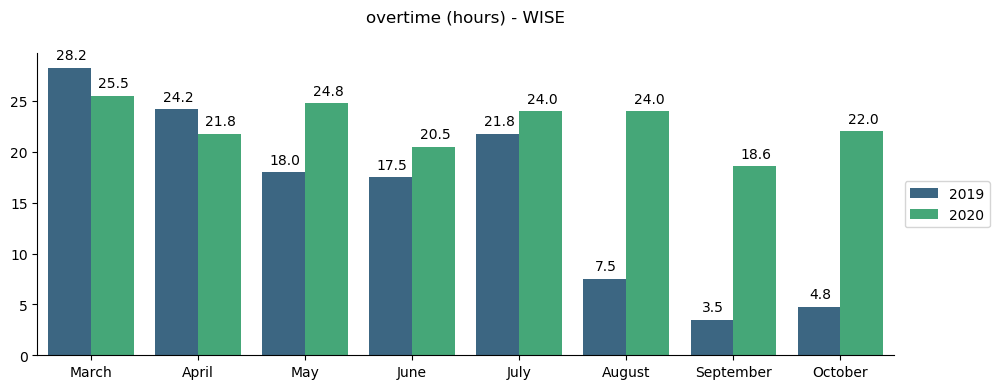

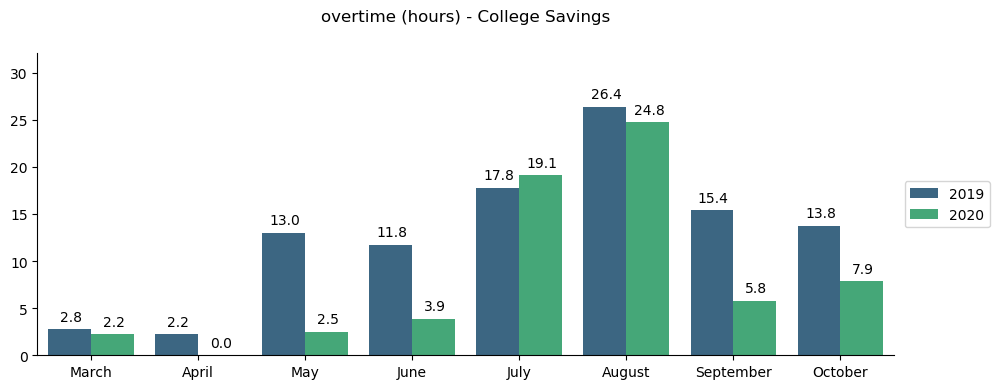

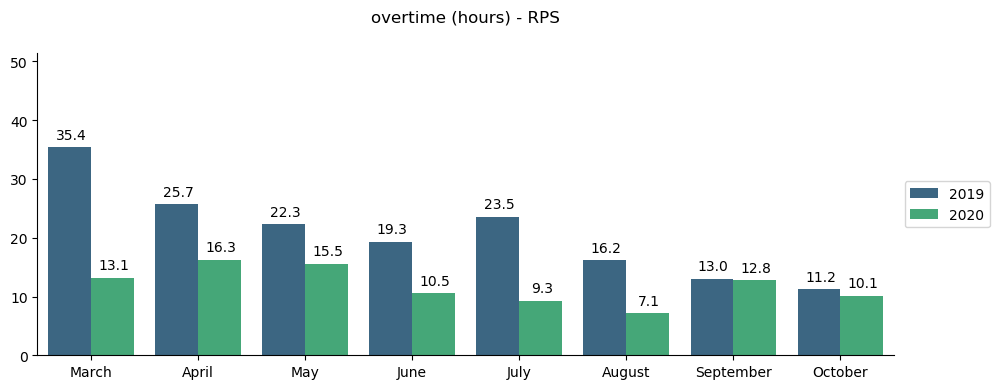

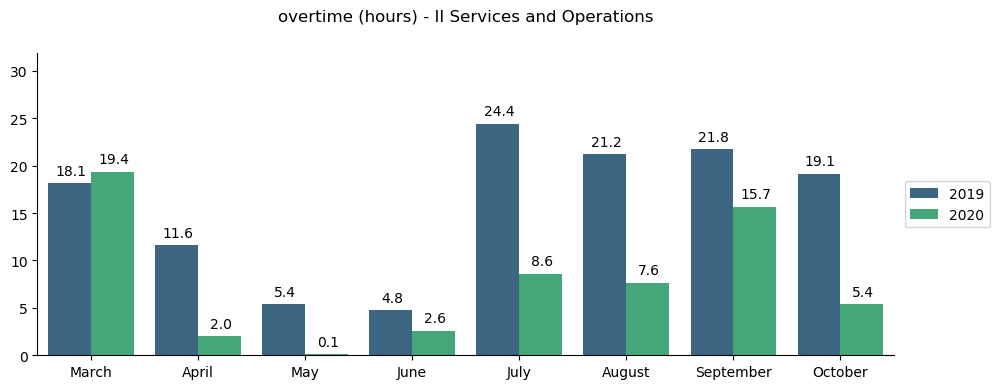

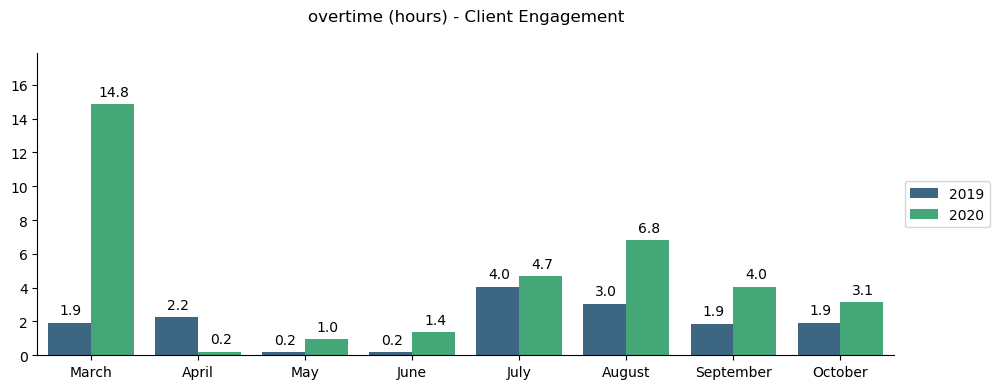

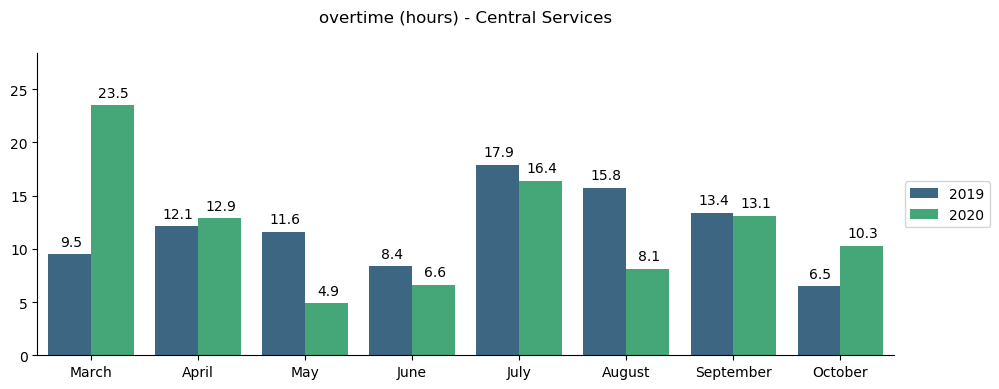

In [49]:
plot_bu(df, 'overtime (hours)', group='div')

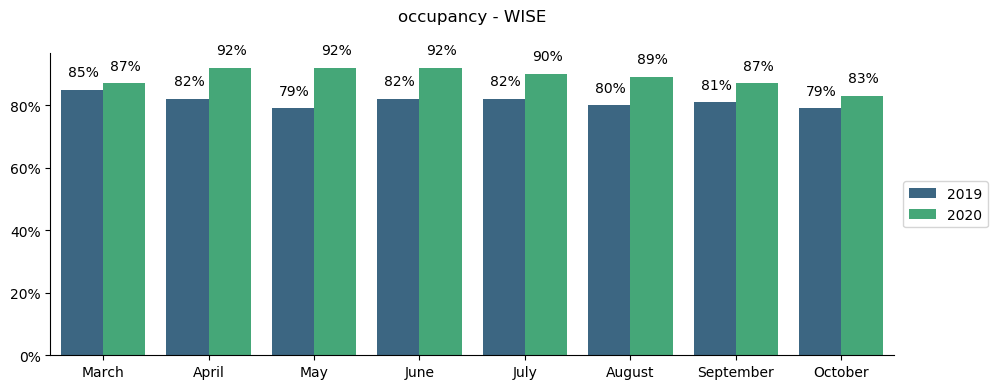

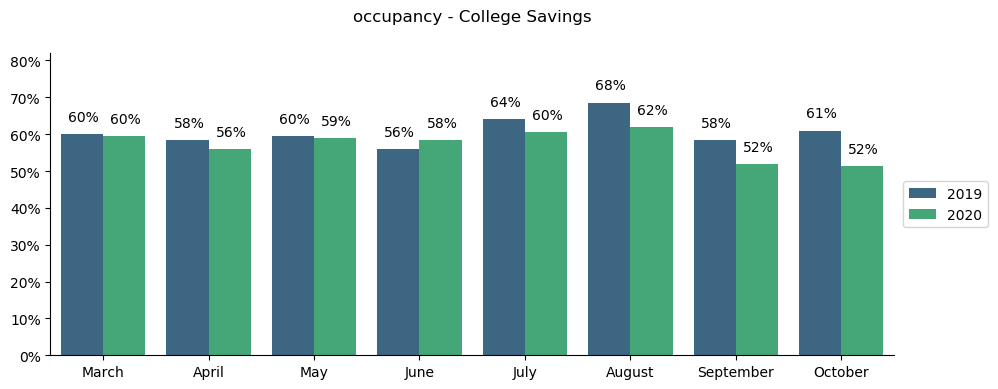

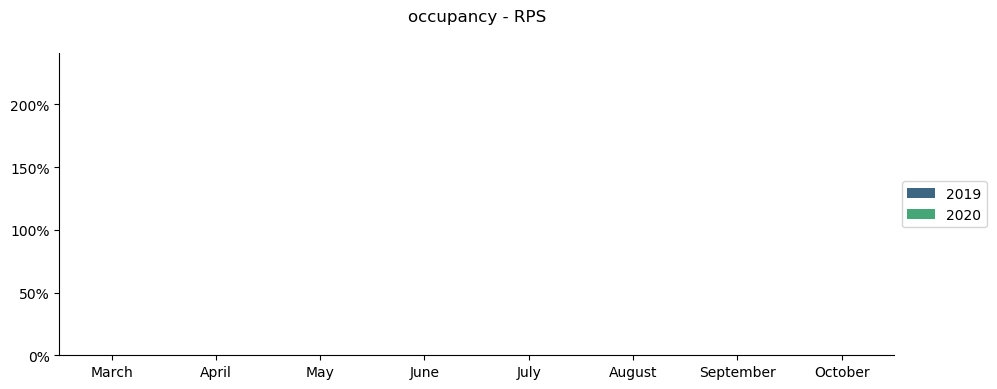

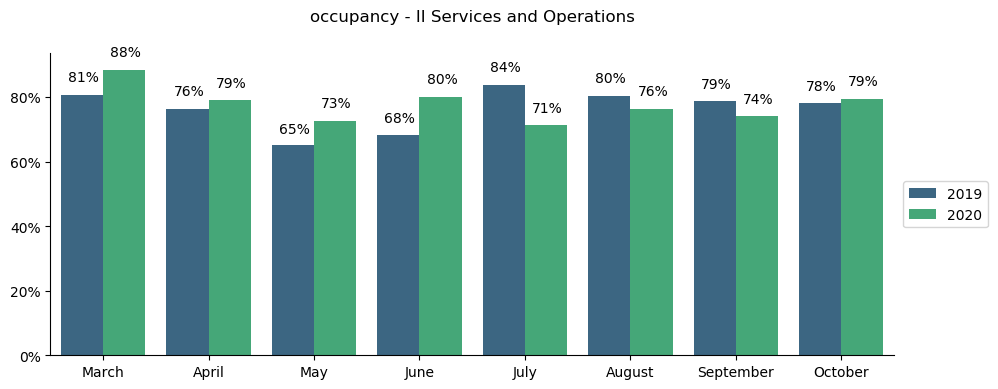

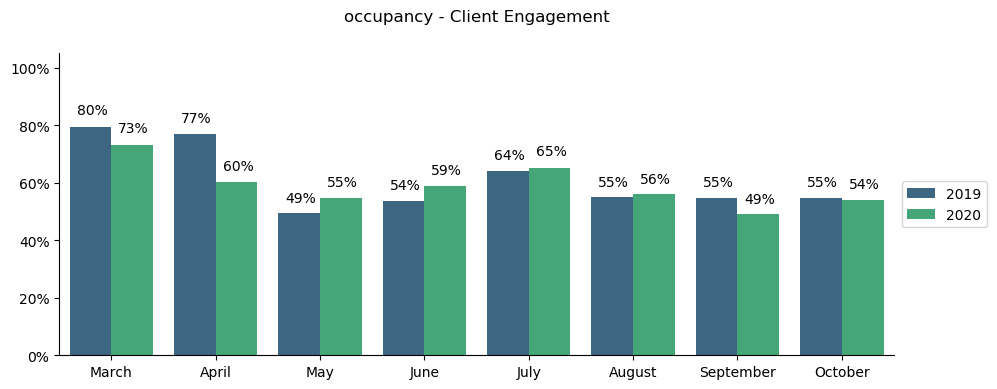

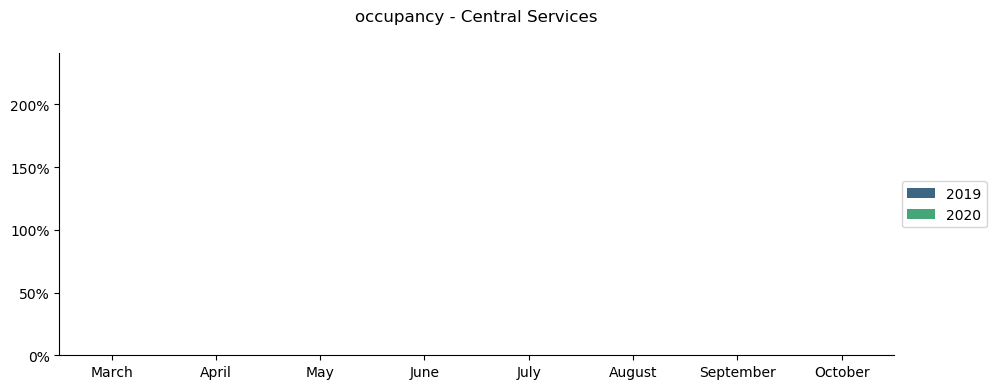

In [50]:
plot_bu(df, 'occupancy', group='div')

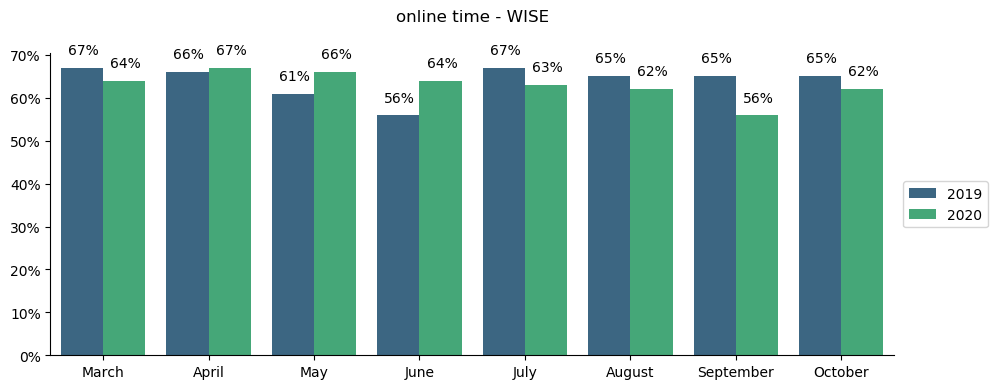

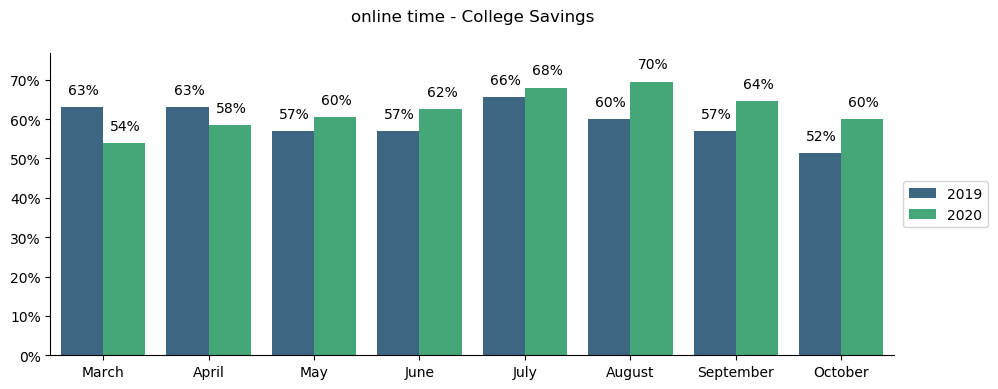

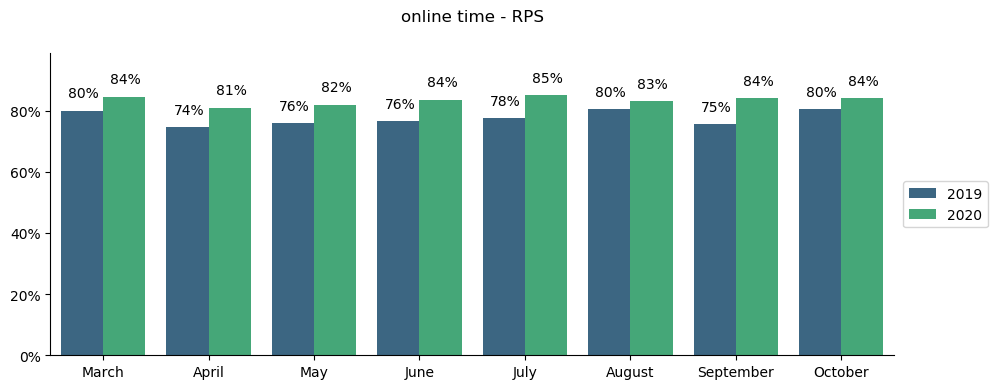

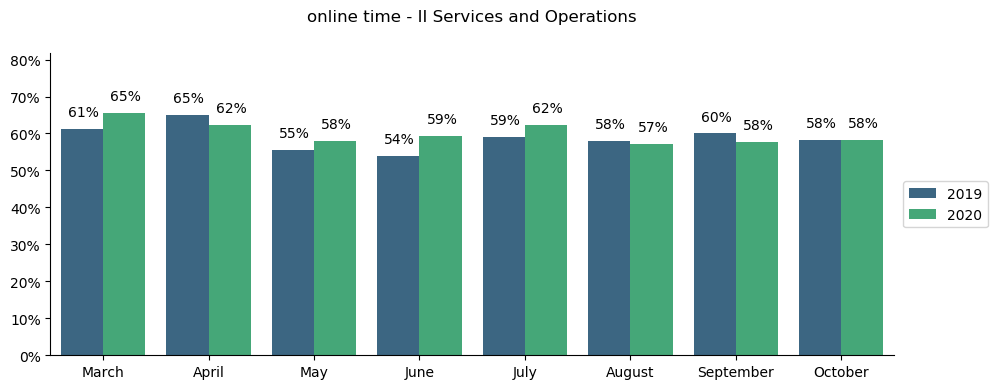

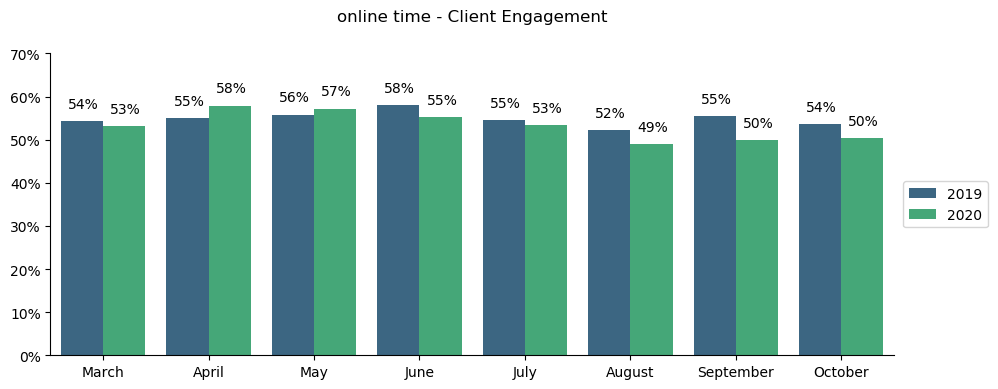

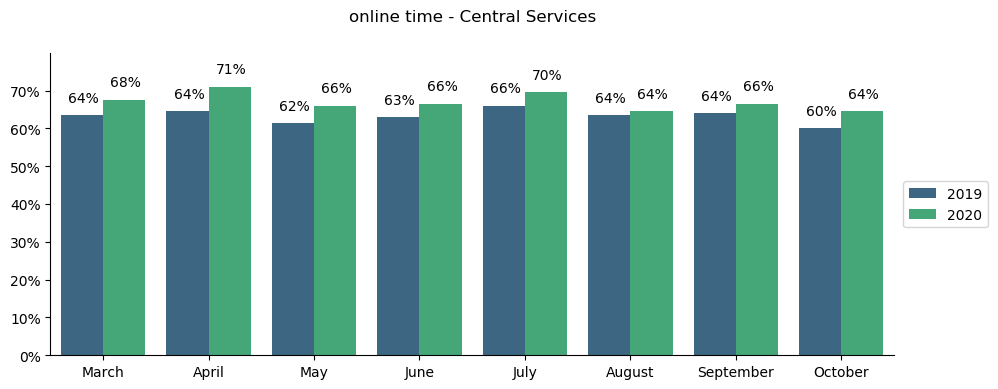

In [51]:
plot_bu(df, 'online time', group='div')

# What is the sum of overtime by division?

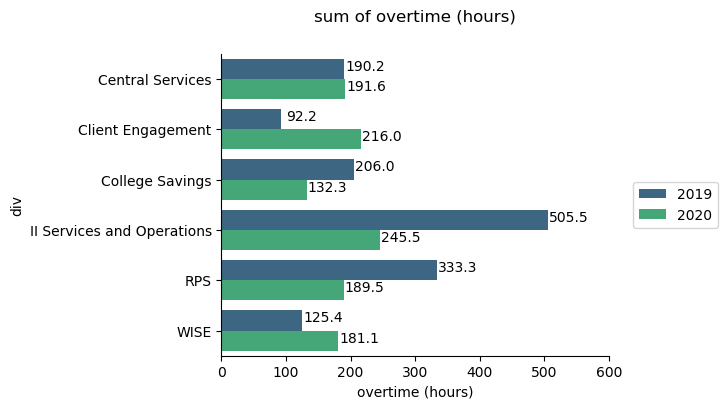

In [55]:
plt.figure(figsize=(5,4), dpi=100)
plt.title('sum of overtime (hours)', y=1.08)
g = df1.groupby(['div', 'year'])['overtime (hours)'].sum()
g = g.reset_index(drop=False)
ax = sns.barplot(data=g, palette='viridis', y='div', x='overtime (hours)', hue='year', errwidth=0)
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy()
    ax.annotate(f'{width:.1f}', ((x + width)+30, y + height/2), 
                           ha = 'center', va = 'center', 
                           xytext = (1, 2), 
                           textcoords = 'offset points')
    

ax.set_xlim(0, 600)
ax.legend(loc='right', bbox_to_anchor=(1.3,0.5))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

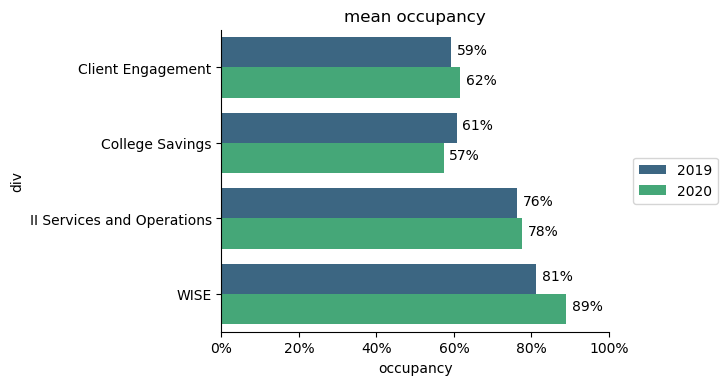

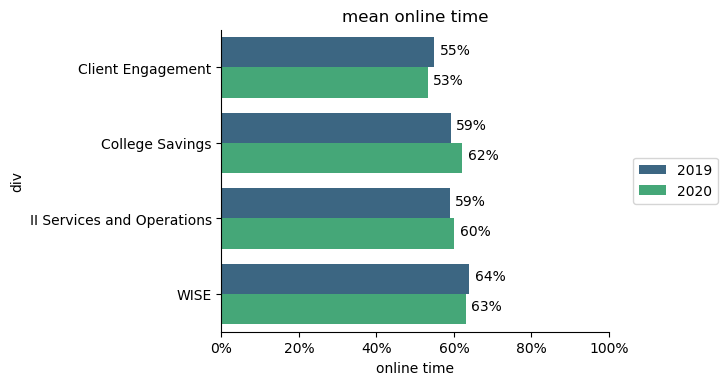

In [58]:
for kpi in ['occupancy', 'online time']:
    plt.figure(figsize=(5,4), dpi=100)
    plt.title('mean '+ kpi)
    g = (df1[~df1['div'].isin(['RPS', 
                                'Central Services'])].groupby(['div', 
                                'year'])[kpi].mean())
    g = g.reset_index(drop=False)
    ax = sns.barplot(data=g, palette='viridis', y='div', x=kpi, hue='year', errwidth=0)
    for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        x, y = p.get_xy()
        ax.annotate(f'{width:.0%}', ((x + width)+.05, y + height/1.2), 
                               ha = 'center', va = 'center', 
                               xytext = (1, 9), 
                               textcoords = 'offset points')

    ax.set_xlim(0, 1)
    ax.legend(loc='right', bbox_to_anchor=(1.3,0.5))
    vals = ax.get_xticks()
    ax.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.show()

# What ratio of overtime does each business unit have?

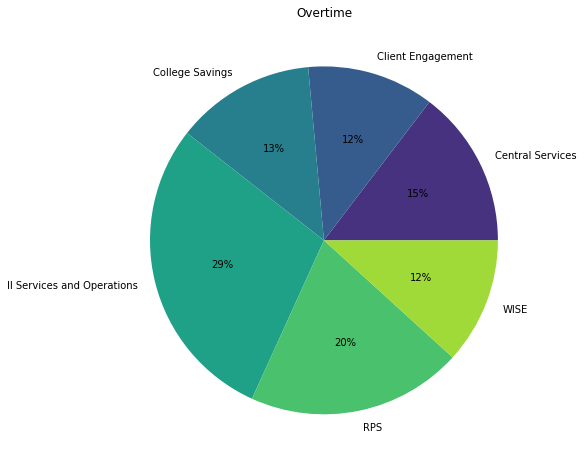

In [69]:
colors = sns.color_palette('viridis').as_hex()
_ = df[['div', 'overtime (hours)']].groupby(['div']).sum().plot(subplots=True, 
                kind='pie', figsize=(8,8), colors=colors,
                  autopct='%0.0f%%',
                  shadow=False)
plt.title('Overtime')
plt.legend().remove()
plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':12.5})
plt.ylabel('')
plt.show()

# Future Work

- get white text in pie chart autopct
- Port this dataset to tableau and try to recreate the paired barplot.